In [60]:
#import tensorflow as tf
import numpy as np
import pandas as pd
import sys
sys.path.append('~/PycharmProjects/feedforwardNet/')
import ffnet

opts = {'batch_size': 1000,
 'display_step': 1,
 'learning_rate': 0.001,
 'training_epochs': 2}

pth = "/Users/gvalmerbr/Downloads/Music/"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read data:

In [59]:
data,target,frm,it,desc = ffnet.loadData(pth)
data[data != 0] = np.log10(data[data !=0])+9
data[data<0]=0

Set feed forward network dimensions

In [3]:
nn_dim = [data.shape[1],2000,1000,500,target.shape[1]]
print nn_dim

[1707, 2000, 1000, 500, 348]


Build neural net

In [4]:
pred, x, y = ffnet.create_ffnn(nn_dim)
#ffnet.sess.run(ffnet.tf.global_variables_initializer())
#p = pred.eval(feed_dict={x:data[0:1,:]})
#print p

Build cost and set optimizer

In [5]:
       # cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
cost = ffnet.tf.losses.mean_squared_error(y, pred)
optimizer = ffnet.tf.train.AdamOptimizer(learning_rate=opts['learning_rate']).minimize(cost)

initialize and stack up together, pred, cost and optimizer

In [61]:
init = ffnet.tf.global_variables_initializer()
ffnet.sess.run(init)
nnet ={'x':x,'y':y,'cost':cost,'optimizer':optimizer,'pred':pred}

Train!

In [62]:
tf = ffnet.nn_train(data,target,nnet,opts)

('Epoch:', '0001', 'cost=', '5103757289.464646339')
('Epoch:', '0002', 'cost=', '10126486.444444448')
Optimization Finished!


In [28]:
d = data[:2000,:]
p = pred.eval(feed_dict={x: d})
c = cost.eval(feed_dict={x: d,y:target[:2000,:]})
print("Cost = ",c)
print("max of pred = ",p.max())


('Cost = ', 2.286984)
('max of pred = ', 578.81305)


(array([1704]), array([315]))


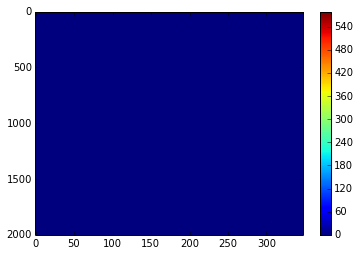

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
h=plt.imshow(p,aspect='auto')
fig.colorbar(h,orientation='vertical')
print np.nonzero(p==p.max())

In [52]:
r = pd.DataFrame(np.transpose(p[1703]),index=desc)
print r.shape
r.nlargest(10,0)

(348, 1)


,0
ACACIA,0.0
ACIDIC,0.0
AGAR_WOOD,0.0
ALCOHOLIC,0.0
ALDEHYDIC,0.0
ALMOND,0.0
ALOE,0.0
AMARETTO,0.0
AMAZON_LILY,0.0
AMBER,0.0


In [33]:
col =ffnet.tf.get_collection(ffnet.tf.GraphKeys.TRAINABLE_VARIABLES)


In [39]:
for tensor in col:
    print tensor


Tensor("Variable/read:0", shape=(1707, 2000), dtype=float32)
Tensor("Variable_1/read:0", shape=(2000,), dtype=float32)
Tensor("Variable_2/read:0", shape=(2000, 1000), dtype=float32)
Tensor("Variable_3/read:0", shape=(1000,), dtype=float32)
Tensor("Variable_4/read:0", shape=(1000, 500), dtype=float32)
Tensor("Variable_5/read:0", shape=(500,), dtype=float32)
Tensor("Variable_6/read:0", shape=(500, 348), dtype=float32)
Tensor("Variable_7/read:0", shape=(348,), dtype=float32)


In [40]:
l1 = col[0]
print l1

Tensor("Variable/read:0", shape=(1707, 2000), dtype=float32)


In [44]:
v =l1.read_value()

In [45]:
v.shape

TensorShape([Dimension(1707), Dimension(2000)])

In [46]:
print v


Tensor("read:0", shape=(1707, 2000), dtype=float32)


In [56]:
print ffnet.getSlice(data,target,10)

(array([[ 0.        ,  0.001875  ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00366636,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00322581,  0.0016129 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))
